In [334]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [857]:
palette = sns.palettes.SEABORN_PALETTES['colorblind']

## 1. Business Understanding

In this uncertain times, it is important for an investor/home buyer to take the best decisions in their home buying/selling processes.

In this project, we are going to answer several questions:

1. do property prices go down?
2. Is the price of most expensive suburbs affected?
3. What factors are important in determining property price? How does the pandemic affect this?

## 2. Data Understanding

### Data Gathering

Data is gathered from Kaggle and from Domain weekly result (see project readme for sources)

In [964]:
df = pd.read_csv('./data/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [967]:
df_2020 = pd.read_csv('./data/2020-melbourne-data.csv')
df_2020.head()

,address,baths,beds,carparks,extracted_date,land_area,property_type,sold_date,sold_price,state,suburb,zip
0,702/6 Acacia Pl,1,1,1,07-03-2020,UNAVAILABLE,Unit,28th February 2020,$425k,VIC,Abbotsford,3067
1,104/10 Trenerry Cr,1,2,1,07-03-2020,UNAVAILABLE,Unit,2nd March 2020,$510k,VIC,Abbotsford,3067
2,56 Roberts Rd,1,2,1,07-03-2020,266m²,Unit,UNAVAILABLE,$630k,VIC,Airport West,3042
3,51 York St,2,3,2,07-03-2020,UNAVAILABLE,House,4th March 2020,Price withheld,VIC,Airport West,3042
4,2/92 Bowes Av,2,3,2,07-03-2020,UNAVAILABLE,Townhouse,26th February 2020,$810k,VIC,Airport West,3042


### Data Assessment

In [965]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [940]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 12 columns):
address           6883 non-null object
baths             6883 non-null object
beds              6883 non-null object
carparks          6883 non-null object
extracted_date    6883 non-null object
land_area         6883 non-null object
property_type     6883 non-null object
sold_date         6883 non-null object
sold_price        6883 non-null object
state             6883 non-null object
suburb            6883 non-null object
zip               6883 non-null object
dtypes: object(12)
memory usage: 645.4+ KB


In [941]:
df_2020.describe()

,address,baths,beds,carparks,extracted_date,land_area,property_type,sold_date,sold_price,state,suburb,zip
count,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883
unique,6063,8,13,17,5,1237,6,62,1426,2,728,421
top,6 Burke Rd,2,3,2,21-03-2020,UNAVAILABLE,House,UNAVAILABLE,Price withheld,VIC,Pakenham,UNAVAILABLE
freq,4,3493,2831,3298,1746,2872,4945,1465,557,6701,82,182


## 3. Data Preparation

### Data cleaning

In [942]:
## remove duplicate listing
df_2020.drop_duplicates('address', inplace=True)

In [943]:
def convert_price_to_int(x):
    '''
    Extract price (e.g. $450k) and convert it into int (e.g 450000)
    
    Returns:
        price in integer
    '''
    num_multiplier = x[-1]
    cleaned_price = x[1:-1]
    try:
        cleaned_price = float(cleaned_price)
    except:
        print('error',x)
        return -1
    
    if num_multiplier == 'k':
        return cleaned_price * 1000
    elif num_multiplier == 'm':
        return cleaned_price * 1000000
    else:
        return -1

In [944]:
# convert sold_price to int
df_2020['sold_price'] = df_2020['sold_price'].apply(convert_price_to_int)

error Price withheld
error Price withheld
error -1
error $1.675m max bid
error Price withheld
error -1
error -1
error -1
error Price withheld
error $510k max bid
error $540k max bid
error $465k max bid
error Price withheld
error -1
error Price withheld
error Price withheld
error Price withheld
error Price withheld
error $655k max bid
error -1
error Price withheld
error Price withheld
error $880k max bid
error Price withheld
error Price withheld
error Price withheld
error -1
error Price withheld
error $1.15m max bid
error $920k max bid
error -1
error -1
error $280k max bid
error $460k max bid
error Price withheld
error -1
error Price withheld
error $1.025m max bid
error -1
error -1
error -1
error $1.5m max bid
error Price withheld
error $1.01m max bid
error -1
error Price withheld
error Price withheld
error Price withheld
error Price withheld
error -1
error Price withheld
error Price withheld
error $1.85m max bid
error -1
error -1
error $1m max bid
error Price withheld
error Price withh

In [945]:
def clean_land_area(x):
    '''
    Returns -1 when x is unavailable and other non numerical values
    Returns float(x) when x is numerical values
    '''
    if (x == 'UNAVAILABLE'):
        return -1
    else:
        try:
            return float(x[:-2].replace(',', ''))
        except:
            print(x)
            return -1

In [946]:
df_2020['land_area'] = df_2020['land_area'].apply(clean_land_area)

In [947]:
# drop -1 price
df_2020 = df_2020[df_2020['sold_price'] != -1]

In [948]:
def clean_unavailable_text(x):
    '''
    Returns int(x) when x is a string integer and -1 otherwise
    '''
    try:
        return int(x)
    except:
        return -1

In [949]:
df_2020['baths'] = df_2020['baths'].apply(clean_unavailable_text) 

In [950]:
df_2020['beds'] = df_2020['beds'].apply(clean_unavailable_text) 

In [953]:
df_2020['carparks'] = df_2020['carparks'].apply(clean_unavailable_text) 

In [604]:
## clean all rows with null price

df_clean = df.dropna(axis=0, subset=['Price'])

In [605]:
## remove unused columns

df_clean = df_clean.drop(columns=['Address', 'SellerG', 'Lattitude', 'Longtitude', 'Bedroom2', 'Date'], axis=1)

In [606]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 15 columns):
Suburb           27247 non-null object
Rooms            27247 non-null int64
Type             27247 non-null object
Price            27247 non-null float64
Method           27247 non-null object
Distance         27246 non-null float64
Postcode         27246 non-null float64
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null object
Regionname       27244 non-null object
Propertycount    27244 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 3.3+ MB


row 29483 is the only with null distance and postcode, it turns out it's missing almost all data, it's safe to remove

In [607]:
df_clean[df_clean['Distance'].isnull()]

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
29483,Fawkner Lot,3,h,616000.0,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [608]:
df_clean.drop(29483, axis=0, inplace=True)

we will also remove row 18523 and 26888 for the same reason

In [609]:
df_clean[df_clean['CouncilArea'].isnull()]

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
18523,Footscray,2,u,710000.0,S,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,825000.0,VB,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [610]:
df_clean.drop([18523, 26888], axis=0, inplace=True)

only numerical variables have missing values

fill missing values with -1, since it does not make sense to fill it with the mean. Put -1 to indicate it's missing

In [611]:
for col in df_clean.columns:
    if (df_clean[col].dtype == np.object):
        continue
    df_clean[col].fillna(-1, inplace=True)

In [612]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
Suburb           27244 non-null object
Rooms            27244 non-null int64
Type             27244 non-null object
Price            27244 non-null float64
Method           27244 non-null object
Distance         27244 non-null float64
Postcode         27244 non-null float64
Bathroom         27244 non-null float64
Car              27244 non-null float64
Landsize         27244 non-null float64
BuildingArea     27244 non-null float64
YearBuilt        27244 non-null float64
CouncilArea      27244 non-null object
Regionname       27244 non-null object
Propertycount    27244 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 3.3+ MB


### Data visualization and analyzis

#### Q1 visualization and analyzis: do property prices go down?

In [614]:
print('2020 median price', df_2020['sold_price'].median())
print('2020 mean price', df_2020['sold_price'].mean())

2020 median price 632500.0
2020 mean price 739163.155784878


In [762]:
print('2016-2018 median price', df_clean['Price'].median())
print('2016-2018 mean price', df_clean['Price'].mean())

2016-2018 median price 870000.0
2016-2018 mean price 1050210.0326677433


In [763]:
prices_comparison = pd.DataFrame()
prices_comparison['Period'] = ['2020', '2016-2018']
prices_comparison['Mean'] = [df_2020['sold_price'].mean(), df_clean['Price'].mean()]
prices_comparison['Median'] = [df_2020['sold_price'].median(), df_clean['Price'].median()]

In [764]:
prices_comparison

,Period,Mean,Median
0,2020,7.391632e+05,632500.0
1,2016-2018,1.050210e+06,870000.0


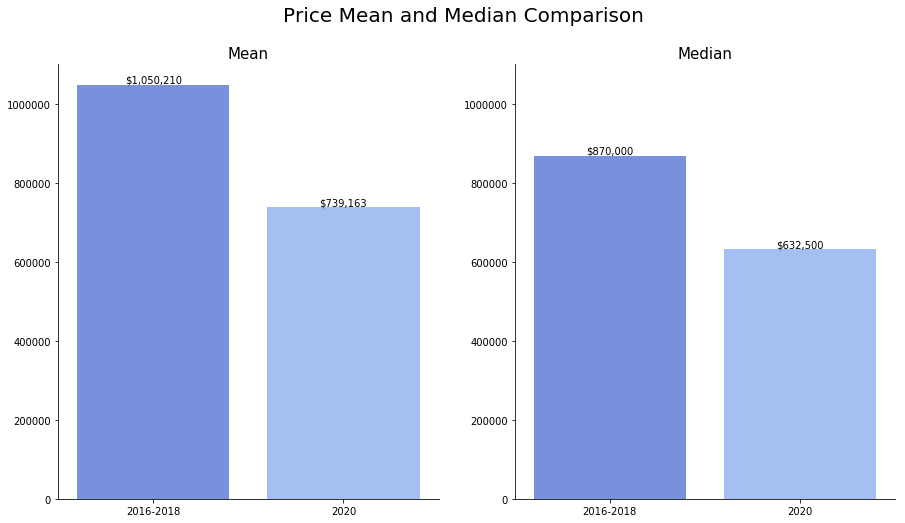

In [766]:
plt.figure(figsize=[15,8])

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = prices_comparison, x='Period', y='Mean', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Mean']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Mean']), ha='center')
plt.title('Mean', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.barplot(data = prices_comparison, x='Period', y='Median', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Median']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Median']), ha='center')
plt.ylim(ax1.get_ylim())
plt.title('Median', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.suptitle('Price Mean and Median Comparison', fontsize=20)
sns.despine()

it should be noted that a lot of auctions was withdrawn, so houses that got sold might be those whose owners need to sell immediately

#### Q2 visualization and analyzis: Is the price of most expensive suburbs affected?

In [772]:
top_15_2020 = df_2020.groupby('suburb').median()['sold_price'].sort_values(ascending=False)[:15]
top_15_2020 = top_15_2020.sort_values()

In [830]:
top_15_2018 = df_clean.groupby('Suburb').median()['Price'].sort_values(ascending=False)[:15]

In [831]:
top_15 = pd.DataFrame()
top_15['Suburb'] = ''
top_15['Median'] = 0
top_15['Period'] = ''

suburbs = top_15_2018.index

# insert rows for 2016-2018 median
for idx, median_price in enumerate(top_15_2018):
    temp = pd.DataFrame([[suburbs[idx], median_price, '2016-2018']], columns=['Suburb','Median','Period'])
    top_15 = pd.concat([temp, top_15], axis=0)
    
top_15.reset_index(inplace=True)
top_15.drop('index', axis=1, inplace=True)

In [832]:
# insert rows for 2020 median
for idx in top_15.index:
    suburb = top_15.loc[idx, 'Suburb'] 
    median_2020 = df_2020[df_2020['suburb'] == suburb].median()['sold_price']
    
    temp = pd.DataFrame([[suburbs[idx], median_2020, '2020']], columns=['Suburb','Median','Period'])
    top_15 = pd.concat([temp, top_15], axis=0)

top_15.reset_index(inplace=True)
top_15.drop('index', axis=1, inplace=True)

In [885]:
data = top_15[top_15['Suburb'] == 'Middle Park']

Text(0.5, 1.0, 'Median Price of Top 15 Most Expensive Suburbs (2016-2018)')

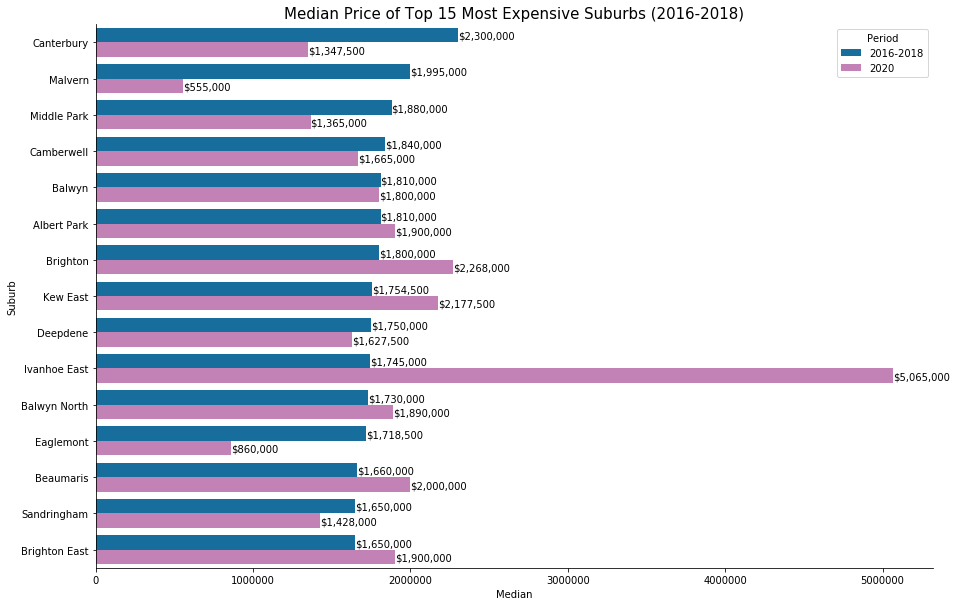

In [897]:
plt.figure(figsize=[15,10])
sns.barplot(data = top_15, y='Suburb', x='Median', hue='Period', order = suburbs, hue_order=['2016-2018', '2020'], palette=[palette[0], palette[4]])

for idx, suburb in enumerate(suburbs):
    data = top_15[top_15['Suburb'] == suburb]
    plt.text(data.iloc[1, 1], idx-0.1, '${:,.0f}'.format(data.iloc[1, 1]))
    plt.text(data.iloc[0, 1], idx+0.3, '${:,.0f}'.format(data.iloc[0, 1]))

sns.despine()
plt.title('Median Price of Top 15 Most Expensive Suburbs (2016-2018)', fontsize=15)

keep in mind that data collected from 2020 is fewer in numbers, so it is most likely to be biased. There is no evidence that house prices in the most expensive suburbs decrease.

## 4. Modeling

to answer question 3 we will build a linear model with L1 regularization (Lasso) to get the variables with highest coeffiecients. As the data for 2016-2018 and 2020 contain different columns, we will only use variables that are in both

we will use one-hot encoding for all non numerical variable

In [903]:
def one_hot_cat_vars(df):
    '''
    One hot encode categorical variables, dropping the first column so it doesnt cause singularities problem
    
    Returns:
        original dataframe with categorical variables encoded
    '''
    
    cat_vars = df.select_dtypes(include=['object'])
    for col in cat_vars.columns:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep = '_', drop_first=1)], axis=1)
    
    return df

In [904]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, model='linear'):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = None
    if model == 'linear':
        lm_model = LinearRegression(normalize=True)
    if model == 'lasso':
        lm_model = Lasso(normalize=True)
    if model == 'ridge':
        lm_model = Ridge(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [905]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [906]:
def print_scores(y_test, y_pred):
    print('r2', r2_score(y_test, y_pred))
    print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('mae', mean_absolute_error(y_test, y_pred))

In [954]:
y_2018 = df_clean['Price']
y_2020 = df_2020['sold_price']

X_2018 = df_clean[['Bathroom', 'Rooms', 'Car', 'Landsize', 'Type', 'Suburb']]
X_2020 = df_2020[['baths', 'beds', 'carparks', 'land_area', 'property_type', 'suburb']]

### Lasso model

In [956]:
X_2018 = one_hot_cat_vars(X_2018)
X_2020 = one_hot_cat_vars(X_2020)

In [957]:
cutoffs = [5000, 3500, 2500, 1000, 100, 30, 10, 5]

#### 2016-2018

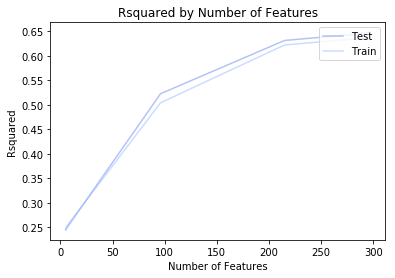

optimized num of variables 297
all variables 349
r2 0.6479616817195375
rmse 380705.3090444661
mae 243535.18627966603


In [958]:
_, _, lm_model_linear_2018, X_train_linear_2018, X_test_linear_2018, y_train_linear_2018, y_test_linear_2018 = find_optimal_lm_mod(X_2018, y_2018, cutoffs, model='lasso')
print('optimized num of variables', X_train_linear_2018.shape[1])
print('all variables', X_2018.shape[1])
print_scores(y_test_linear_2018, lm_model_linear_2018.predict(X_test_linear_2018))

In [959]:
# see largest coef
coef_df = coef_weights(lm_model_linear_2018.coef_, X_train_linear_2018)

coef_df.head(20)

,est_int,coefs,abs_coefs
60,Suburb_Canterbury,1.413163e+06,1.413163e+06
193,Suburb_Middle Park,1.314342e+06,1.314342e+06
181,Suburb_Malvern,1.217436e+06,1.217436e+06
43,Suburb_Brighton,1.129018e+06,1.129018e+06
9,Suburb_Albert Park,1.090876e+06,1.090876e+06
271,Suburb_Toorak,1.089503e+06,1.089503e+06
108,Suburb_East Melbourne,9.535047e+05,9.535047e+05
16,Suburb_Armadale,9.379011e+05,9.379011e+05
25,Suburb_Balwyn,9.152074e+05,9.152074e+05
164,Suburb_Kew,9.001096e+05,9.001096e+05


#### 2020

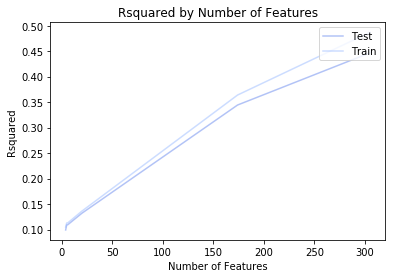

optimized num of variables 305
all variables 729
r2 0.44657252975489903
rmse 354295.8587634754
mae 194986.31129281045


In [960]:
_, _, lm_model_linear_2020, X_train_linear_2020, X_test_linear_2020, y_train_linear_2020, y_test_linear_2020 = find_optimal_lm_mod(X_2020, y_2020, cutoffs, model='lasso')
print('optimized num of variables', X_train_linear_2020.shape[1])
print('all variables', X_2020.shape[1])
print_scores(y_test_linear_2020, lm_model_linear_2020.predict(X_test_linear_2020))

In [961]:
# see largest coef
coef_df = coef_weights(lm_model_linear_2020.coef_, X_train_linear_2020)

coef_df.head(20)

,est_int,coefs,abs_coefs
160,suburb_Kew,1.367298e+06,1.367298e+06
201,suburb_Mount Eliza,1.055931e+06,1.055931e+06
270,suburb_Surrey Hills,1.043289e+06,1.043289e+06
35,suburb_Black Rock,9.825528e+05,9.825528e+05
47,suburb_Brighton,9.659577e+05,9.659577e+05
179,suburb_Malvern East,9.557071e+05,9.557071e+05
18,suburb_Aspendale,9.438645e+05,9.438645e+05
276,suburb_Templestowe,8.146875e+05,8.146875e+05
280,suburb_Toorak,7.896068e+05,7.896068e+05
22,suburb_Balwyn North,7.845345e+05,7.845345e+05


## 5. Evaluation

### do property prices go down?

From the charts of median vs mean (recopied below), there is evidence to suggest that price does go down during the pandemic

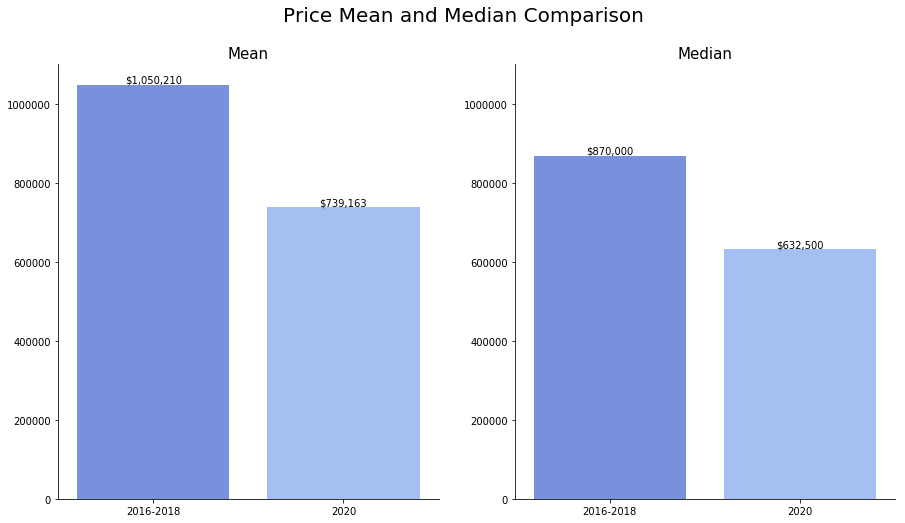

In [969]:
plt.figure(figsize=[15,8])

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = prices_comparison, x='Period', y='Mean', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Mean']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Mean'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Mean']), ha='center')
plt.title('Mean', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.subplot(1, 2, 2)
sns.barplot(data = prices_comparison, x='Period', y='Median', order=['2016-2018', '2020'])
plt.text(0, prices_comparison.loc[1, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[1, 'Median']), ha='center')
plt.text(1, prices_comparison.loc[0, 'Median'] + 5000, '${:,.0f}'.format(prices_comparison.loc[0, 'Median']), ha='center')
plt.ylim(ax1.get_ylim())
plt.title('Median', fontsize=15)
plt.ylabel('')
plt.xlabel('')

plt.suptitle('Price Mean and Median Comparison', fontsize=20)
sns.despine()

### Is the price of most expensive suburbs affected?

However, most expensive suburbs seem to be unaffected. There is no evidence to suggest that prices for these suburbs fall.

Text(0.5, 1.0, 'Median Price of Top 15 Most Expensive Suburbs (2016-2018)')

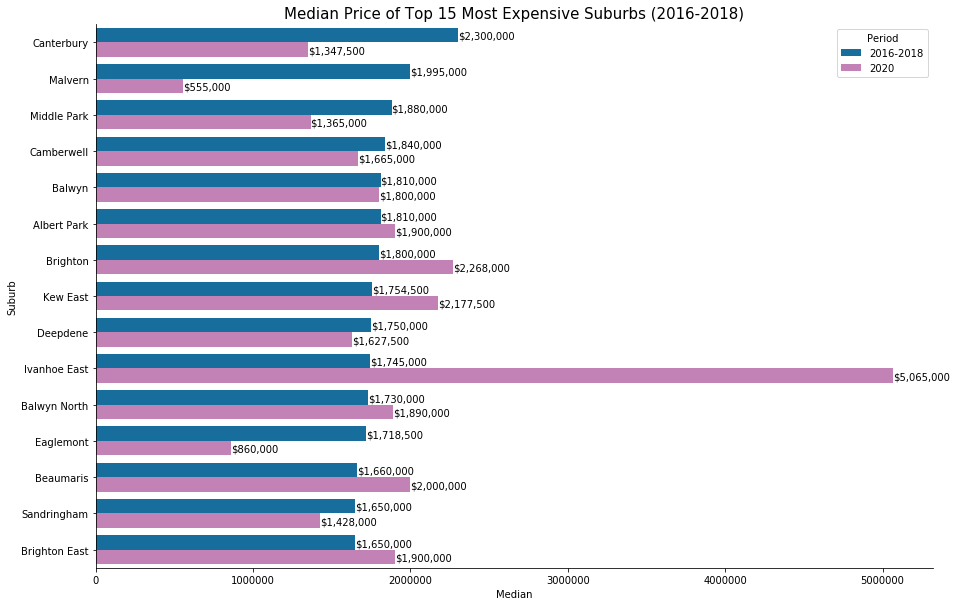

In [970]:
plt.figure(figsize=[15,10])
sns.barplot(data = top_15, y='Suburb', x='Median', hue='Period', order = suburbs, hue_order=['2016-2018', '2020'], palette=[palette[0], palette[4]])

for idx, suburb in enumerate(suburbs):
    data = top_15[top_15['Suburb'] == suburb]
    plt.text(data.iloc[1, 1], idx-0.1, '${:,.0f}'.format(data.iloc[1, 1]))
    plt.text(data.iloc[0, 1], idx+0.3, '${:,.0f}'.format(data.iloc[0, 1]))

sns.despine()
plt.title('Median Price of Top 15 Most Expensive Suburbs (2016-2018)', fontsize=15)

### What factors are important in determining property price? How does the pandemic affect this?

Suburbs where the properties are located are the most important factors that affect prices. This seems to be the case both in 2016-2018 and during the pandemic.